In [319]:

import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [320]:
features = pd.read_csv('spam.dat')


In [321]:
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB


In [322]:
features.describe()


,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
count,4789.000000,4789.0,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,0.008144,0.0,0.006056,0.000209,0.006682,0.000626,0.005638,0.007308,0.001879,0.002088,...,0.315097,0.001044,0.000626,0.012946,0.009397,0.000418,0.019420,0.000835,0.001253,0.000626
std,0.089883,0.0,0.077590,0.014450,0.081478,0.025023,0.074882,0.085185,0.043315,0.045653,...,0.464603,0.032298,0.025023,0.113055,0.096489,0.020434,0.138009,0.028892,0.035377,0.025023
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [323]:
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(['no','yes'])
features.loc[:,'target'] = labelEncoder.transform(features['target'])

In [324]:
features.head()
features.isnull().sum()

ACT_NOW            0
ADDRESSES_ON_CD    0
ADULT_SITE         0
ADVERT_CODE        0
ADVERT_CODE2       0
                  ..
X_PRIORITY_HIGH    0
X_STORMPOST_TO     0
X_X_PRESENT        0
YOUR_INCOME        0
target             0
Length: 463, dtype: int64

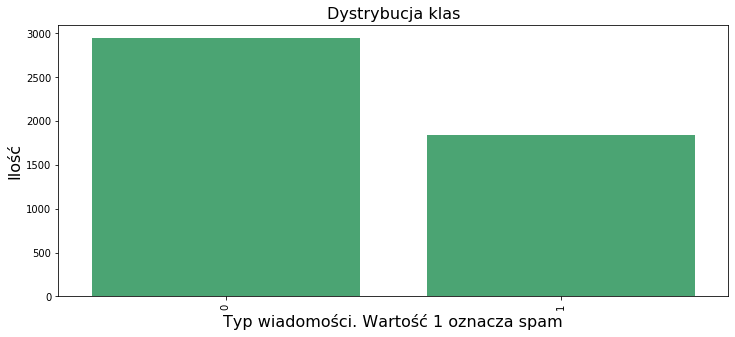

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(x=features.target, color='mediumseagreen')
plt.title('Dystrybucja klas', fontsize=16)
plt.ylabel('Ilość', fontsize=16)
plt.xlabel('Typ wiadomości. Wartość 1 oznacza spam', fontsize=16)
plt.xticks(rotation='vertical');

In [326]:
import numpy as np

correlations =  features.drop("target", axis=1).apply(lambda x: x.corr(features.target))
nans = []
scores=[]
for feature in features.iteritems():
    correlation = feature[1].corr(features.target)
    print(f"{feature[0]}: {correlation}")
    
    if np.isnan(correlation):
        nans.append(feature[0])
    scores.append(correlation)
features =  features.drop(nans, axis=1)
print(f"Najwieksza korelacja: {max(correlations)}")
print(f"Najmniejsza korelacja: {min(correlations)}")

ACT_NOW: 0.10993674671036519
ADDRESSES_ON_CD: nan
ADULT_SITE: 0.09881525537548108
ADVERT_CODE: 0.018295799989749104
ADVERT_CODE2: 0.10383335531615924
ALL_CAPS_HEADER: 0.014538472202316844
ALL_CAP_PORN: 0.09532694196384595
ALL_NATURAL: 0.10862578007013857
AMATEUR_PORN: 0.0549333116460071
AMAZING: 0.05791085267650537
AMAZING_STUFF: 0.044838792594248764
AOL_USERS_LINK: 0.05493331164600724
APPLY_ONLINE: 0.021742769057671994
APPROVED_BY: -0.16317414215980236
ASCII_FORM_ENTRY: 0.03225317721172209
ASKS_BILLING_ADDRESS: 0.044838792594248694
AS_SEEN_ON: 0.17619462866631075
BAD_CREDIT: 0.12307411589083916
BALANCE_FOR_LONG_20K: 0.006052128698605897
BALANCE_FOR_LONG_40K: -0.022838130478730796
BANKRUPTCY: 0.031695875695884064
BASE64_ENC_TEXT: 0.2938542940460415
BEEN_TURNED_DOWN: 0.03719964112790706
BEST_PORN: 0.07556187359947966
BE_AMAZED: 0.036603068903139475
BE_BOSS: 0.060743770305115796
BIG_FONT: 0.4380895953966236
BILL_1618: 0.07556187359947972
BUGGY_CGI: 0.054933311646006996
BUGZILLA_BUG: -0.0

In [327]:
sorted(scores)

[0.06604926541675588,
 0.10993674671036519,
 nan,
 -0.16317414215980236,
 -0.09756197756427647,
 -0.07863930730885979,
 -0.022838130478730796,
 0.006052128698605897,
 0.014538472202316844,
 0.018295799989749104,
 0.018295799989749128,
 0.021742769057671994,
 0.025876870884120298,
 0.025876870884120357,
 0.03169587569588402,
 0.031695875695884064,
 0.03225317721172209,
 0.036603068903139475,
 0.03660306890313948,
 0.036603068903139566,
 0.03719964112790706,
 0.044838792594248646,
 0.044838792594248694,
 0.044838792594248764,
 0.04483879259424878,
 0.05178620622000729,
 0.054933311646006996,
 0.0549333116460071,
 0.05493331164600724,
 0.05493331164600735,
 0.05493331164600753,
 0.05791085267650537,
 0.060743770305115796,
 0.06604926541675578,
 0.06604926541675597,
 0.06834375753485342,
 0.07556187359947966,
 0.07556187359947972,
 0.07776067450297144,
 0.09532694196384595,
 0.09881525537548108,
 0.10383335531615924,
 0.10383335531615928,
 0.10862578007013851,
 0.10862578007013857,
 0.1219

In [143]:
label = features['target']
features.drop('target', axis = 1, inplace=True)
features.head()

,ACT_NOW,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,AMAZING_STUFF,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [144]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [147]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [202]:
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9822546972860126
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       579
           1       0.99      0.97      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.991364  0.008636
0  0.031662  0.968338


In [231]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

def describe_results(y_test, y_predict):
    
    print(F"Acc: {accuracy_score(y_test, y_predict)}")
    #, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
    print(classification_report(y_test, y_predict))
    print("Macierz konfuzji")
    print(pd.DataFrame(
            confusion_matrix(y_test, y_predict,normalize='true'),
            columns=['1', '0'],
            index=['1', '0']))

In [219]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(dataset)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)


Explained Variance ratio by Principal Component  1  :  0.12254469137417344
Explained Variance ratio by Principal Component  2  :  0.0418203817320791
Explained Variance ratio by Principal Component  3  :  0.03764319207928961
Explained Variance ratio by Principal Component  4  :  0.02832703333464853
Explained Variance ratio by Principal Component  5  :  0.025229996243784632
Explained Variance ratio by Principal Component  6  :  0.02464951479262506
Explained Variance ratio by Principal Component  7  :  0.02311889944890557
Explained Variance ratio by Principal Component  8  :  0.01885048725184086
Explained Variance ratio by Principal Component  9  :  0.016680491977920906
Explained Variance ratio by Principal Component  10  :  0.015689069731580327
Explained Variance ratio by Principal Component  11  :  0.014995038154819154
Explained Variance ratio by Principal Component  12  :  0.014466017498672587
Explained Variance ratio by Principal Component  13  :  0.014043040794612105
Explained Varian

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [308]:
pca = PCA(n_components = 430)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)
y_predict = model.predict(X_test_pca)
describe_results(y_test, y_predict)

Acc: 0.9530271398747391
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       579
           1       0.94      0.94      0.94       379

    accuracy                           0.95       958
   macro avg       0.95      0.95      0.95       958
weighted avg       0.95      0.95      0.95       958

Macierz konfuzji
          1         0
1  0.958549  0.041451
0  0.055409  0.944591


In [265]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9812108559498957
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       579
           1       0.98      0.97      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.987910  0.012090
0  0.029024  0.970976


In [266]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9853862212943633
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       579
           1       0.99      0.97      0.98       379

    accuracy                           0.99       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.99      0.99      0.99       958

Macierz konfuzji
          1         0
1  0.994819  0.005181
0  0.029024  0.970976


In [263]:
import xgboost as xgb


model = xgb.XGBClassifier(n_estimators=5000,learning_rate=0.02)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9791231732776617
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       579
           1       0.99      0.96      0.97       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.993092  0.006908
0  0.042216  0.957784


In [316]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=5000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)


Acc: 0.975991649269311
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       579
           1       0.98      0.96      0.97       379

    accuracy                           0.98       958
   macro avg       0.98      0.97      0.97       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.986183  0.013817
0  0.039578  0.960422


In [272]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)


Acc: 0.9822546972860126
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       579
           1       0.99      0.96      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.996546  0.003454
0  0.039578  0.960422


In [274]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd',  random_state=21,tol=0.000000001)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)


Acc: 0.9812108559498957
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       579
           1       0.98      0.97      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.987910  0.012090
0  0.029024  0.970976


/home/tomasz/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [275]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)


Acc: 0.9822546972860126
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       579
           1       0.99      0.96      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.996546  0.003454
0  0.039578  0.960422


In [276]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)


Acc: 0.918580375782881
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       579
           1       1.00      0.79      0.89       379

    accuracy                           0.92       958
   macro avg       0.94      0.90      0.91       958
weighted avg       0.93      0.92      0.92       958

Macierz konfuzji
          1         0
1  1.000000  0.000000
0  0.205805  0.794195


In [277]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9592901878914405
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       579
           1       0.97      0.93      0.95       379

    accuracy                           0.96       958
   macro avg       0.96      0.95      0.96       958
weighted avg       0.96      0.96      0.96       958

Macierz konfuzji
          1         0
1  0.981002  0.018998
0  0.073879  0.926121


In [282]:
model = RandomForestClassifier(class_weight={0:0.9, 1:1.1})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9853862212943633
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       579
           1       0.99      0.97      0.98       379

    accuracy                           0.99       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.99      0.99      0.99       958

Macierz konfuzji
          1         0
1  0.996546  0.003454
0  0.031662  0.968338


In [285]:
model = RandomForestClassifier(class_weight={0:0.95, 1:0.5})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9822546972860126
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       579
           1       0.99      0.96      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.996546  0.003454
0  0.039578  0.960422


In [287]:
model = RandomForestClassifier(class_weight={0:1.05, 1:0.95})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9843423799582464
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       579
           1       0.99      0.97      0.98       379

    accuracy                           0.98       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.994819  0.005181
0  0.031662  0.968338


In [288]:
model = RandomForestClassifier(class_weight={0:1.1, 1:0.9})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9822546972860126
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       579
           1       0.99      0.96      0.98       379

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.996546  0.003454
0  0.039578  0.960422


In [291]:
pca = PCA(n_components = 400)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_predict = model.predict(X_test_pca)
describe_results(y_test, y_predict)

Acc: 0.9144050104384134
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       579
           1       0.89      0.90      0.89       379

    accuracy                           0.91       958
   macro avg       0.91      0.91      0.91       958
weighted avg       0.91      0.91      0.91       958

Macierz konfuzji
          1         0
1  0.924007  0.075993
0  0.100264  0.899736


In [313]:
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier()
trans = SelectFromModel(model, threshold='median')
transofred_train_data = trans.fit_transform(X_train, y_train)
transofred_test_data = trans.transform(X_test)

model.fit(transofred_train_data, y_train)
y_predict = model.predict(transofred_test_data)
describe_results(y_test, y_predict)


Acc: 0.9843423799582464
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       579
           1       0.99      0.97      0.98       379

    accuracy                           0.98       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.994819  0.005181
0  0.031662  0.968338


In [315]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(RandomForestClassifier())
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
describe_results(y_test, y_predict)

Acc: 0.9843423799582464
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       579
           1       0.99      0.97      0.98       379

    accuracy                           0.98       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958

Macierz konfuzji
          1         0
1  0.996546  0.003454
0  0.034301  0.965699
